In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
train_data_frame = pd.read_csv('../Datasets/loan/train_loan_predection.csv')
test_data_frame = pd.read_csv('../Datasets/loan/test_loan_predection.csv')

In [3]:
train_data_frame.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test_data_frame['Loan_Status'] = 'Test'

In [6]:
df = pd.concat((train_data_frame, test_data_frame), axis = 0) #axis is to concat row wise

In [7]:
df.Loan_Status.unique()

array(['Y', 'N', 'Test'], dtype=object)

In [8]:
loan_df = df.set_index('Loan_ID')

In [9]:
loan_df.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
loan_df[loan_df.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N


In [11]:
loan_df = loan_df.dropna(how='any')

In [12]:
len(loan_df)

769

In [13]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
loan_df.Dependents.value_counts()

0     441
2     135
1     122
3+     71
Name: Dependents, dtype: int64

In [16]:
loan_df.Dependents.apply(lambda x:str(x)).value_counts()

0     441
2     135
1     122
3+     71
Name: Dependents, dtype: int64

In [17]:
# Convert Dependents column to integers
loan_df['Dependents'] = loan_df.Dependents.apply(lambda x: int(x.replace('+','')))

In [18]:
loan_df.Dependents.value_counts()

0    441
2    135
1    122
3     71
Name: Dependents, dtype: int64

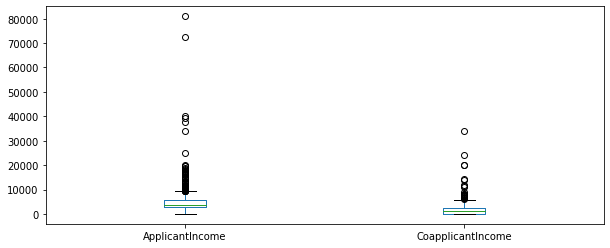

In [19]:
columns = ['ApplicantIncome', 'CoapplicantIncome']
loan_df[columns].plot(kind='box',figsize=(10,4))

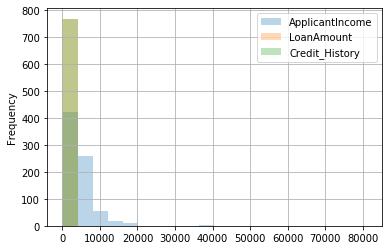

In [20]:
columns = ['ApplicantIncome','LoanAmount', 'Credit_History']
loan_df[columns].plot(kind='hist',bins=20,grid=True,alpha=0.3)

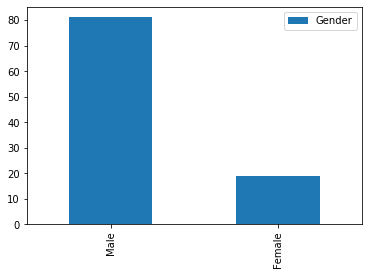

In [21]:
column_name = 'Gender'
pd.DataFrame(loan_df[column_name].value_counts()*100/len(loan_df)).plot(kind='bar')

In [22]:
loan_df['LoanAmount_pct'] = loan_df.LoanAmount *100 / loan_df.ApplicantIncome

In [23]:
pd.cut(loan_df['LoanAmount_pct'],[0,1,2,3,4,5,6,8,10,20,100]).value_counts().sort_index()

(0, 1]        29
(1, 2]        89
(2, 3]       248
(3, 4]       175
(4, 5]       108
(5, 6]        67
(6, 8]        37
(8, 10]        3
(10, 20]       9
(20, 100]      2
Name: LoanAmount_pct, dtype: int64

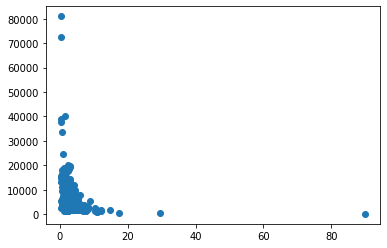

In [24]:
plt.scatter(loan_df.LoanAmount_pct,loan_df.ApplicantIncome)
plt.show()

In [25]:
loan_df['TotalIncome'] = loan_df.ApplicantIncome + loan_df.CoapplicantIncome

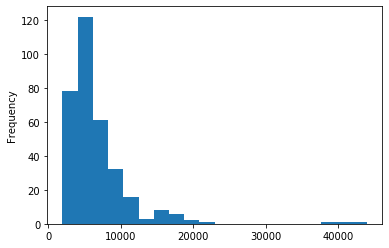

In [26]:
loan_df[loan_df.Loan_Status=='Y'].TotalIncome.plot(kind='hist',bins=20)

In [27]:
columns_retained = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [28]:
loan_df.Loan_Status.unique()

array(['N', 'Y', 'Test'], dtype=object)

In [29]:
columns = ['Gender','Married','Education','Self_Employed','Property_Area']
df = loan_df[columns_retained]
df = pd.get_dummies(df,columns=columns,drop_first=True)

In [30]:
df["Loan_Status"].unique()

array(['N', 'Y', 'Test'], dtype=object)

In [31]:
test_df =df[df.Loan_Status == "Test"]

In [32]:
test_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,
LP001015,0,5720,0.0,110.0,360.0,1.0,Test,1,1,0,0,0,1
LP001022,1,3076,1500.0,126.0,360.0,1.0,Test,1,1,0,0,0,1
LP001031,2,5000,1800.0,208.0,360.0,1.0,Test,1,1,0,0,0,1
LP001051,0,3276,0.0,78.0,360.0,1.0,Test,1,0,1,0,0,1
LP001054,0,2165,3422.0,152.0,360.0,1.0,Test,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002969,1,2269,2167.0,99.0,360.0,1.0,Test,1,1,0,0,1,0
LP002971,3,4009,1777.0,113.0,360.0,1.0,Test,1,1,1,1,0,1
LP002975,0,4158,709.0,115.0,360.0,1.0,Test,1,1,0,0,0,1


In [33]:
train_df = df[df.Loan_Status != "Test"]

In [34]:
train_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,
LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
LP001005,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
LP001008,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1
LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,0
LP002979,3,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0,0,0
LP002983,1,8072,240.0,253.0,360.0,1.0,Y,1,1,0,0,0,1


In [35]:
loan_status_map = {'Y':1,'N':0}
train_df['Loan_Status'] = train_df.Loan_Status.map(loan_status_map)

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
train_df['Loan_Status']

Loan_ID
LP001003    0
LP001005    1
LP001006    1
LP001008    1
LP001011    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 480, dtype: int64

In [37]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
X_train,X_test = train_test_split(train_df,test_size=0.2, random_state=42)

In [39]:
y_train = X_train['Loan_Status']
y_test = X_test['Loan_Status']
X_train = X_train.drop('Loan_Status',axis=1)
X_test = X_test.drop('Loan_Status',axis=1)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=None,random_state=42)

In [42]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", metrics.confusion_matrix(y_test, y_pred))
print("precision score: ", metrics.precision_score(y_test, y_pred))
print("Recall Score :", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8229166666666666
Confusion Matrix:  [[14 14]
 [ 3 65]]
precision score:  0.8227848101265823
Recall Score : 0.9558823529411765


In [46]:
from sklearn.metrics import classification_report
classification_report(y_true=y_test, y_pred=y_pred,output_dict=True)

{'0': {'precision': 0.8235294117647058,
  'recall': 0.5,
  'f1-score': 0.6222222222222222,
  'support': 28},
 '1': {'precision': 0.8227848101265823,
  'recall': 0.9558823529411765,
  'f1-score': 0.8843537414965986,
  'support': 68},
 'accuracy': 0.8229166666666666,
 'macro avg': {'precision': 0.8231571109456441,
  'recall': 0.7279411764705883,
  'f1-score': 0.7532879818594105,
  'support': 96},
 'weighted avg': {'precision': 0.8230019856043684,
  'recall': 0.8229166666666666,
  'f1-score': 0.8078987150415721,
  'support': 96}}

In [47]:
from sklearn.svm import SVC

In [48]:
clf_svc = sklearn.svm.SVC(C=0.7,random_state=42,kernel='linear')
clf_svc

SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
clf_svc.fit(X_train,y_train)

In [ ]:
y_pred = clf_svc.predict(X_test)

In [ ]:
classification_report(y_true=y_test, y_pred=y_pred,output_dict=True)

In [ ]:
clf_lr = sklearn.linear_model.LogisticRegression(random_state=42)
clf_lr

In [ ]:
clf_lr.fit(X_train,y_train)

In [ ]:
y_pred = clf_lr.predict(X_test)

In [ ]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

In [ ]:
classification_report(y_true=y_test, y_pred=y_pred,output_dict=True)